In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 读取所有以episode_statistics_adp0_demandrandom为前缀的Excel文件
import glob
weights = [0.1,0.3,0.5,0.7,0.9,1.0]
file_pattern_list = []
for weight in weights:
    file_pattern_list.append(f'results/integrated_tests/episode_statistics_adp{weight}_demandrandom_*.xlsx')

file_pattern0 = 'results/integrated_tests/episode_statistics_adp0_demandrandom_*.xlsx'
matching_files0 =  glob.glob(file_pattern0)

adp_0 = pd.read_excel(matching_files0[0], sheet_name='Episode_Statistics')


# file_pattern_0_1 = 'results/integrated_tests/episode_statistics_adp0.1_demandrandom_*.xlsx'
file_pattern_heuristic = 'results/integrated_tests_h/episode_statistics_adp0_demandrandom_0.25_*.xlsx'

matching_files_list = []
for file_pattern in file_pattern_list:
    matching_files = glob.glob(file_pattern)
    matching_files_list.append(matching_files)

data_list = []
for matching_files in matching_files_list:
    adp = pd.read_excel(matching_files[0], sheet_name='Episode_Statistics')
    data_list.append(adp)

matching_files_heuristic = glob.glob(file_pattern_heuristic)

# adp_0 = pd.read_excel(matching_files[0], sheet_name='Episode_Statistics')
# adp_0_1 = pd.read_excel(matching_files_0_1[0], sheet_name='Episode_Statistics')
adp_h = pd.read_excel(matching_files_heuristic[0], sheet_name='Episode_Statistics')

In [5]:
data_list[0].columns

Index(['episode_time', 'total_orders', 'accepted_orders', 'rejected_orders',
       'active_orders', 'completed_orders', 'avg_request_value',
       'avg_battery_level', 'finished_charge', 'charge_stats',
       'total_vehicles', 'ev_count', 'aev_count', 'ev_rejected',
       'aev_rejected', 'total_stations', 'vehicles_charging',
       'total_rebalancing_calls', 'total_rebalancing_assignments',
       'avg_rebalancing_assignments_per_call',
       'avg_rebalancing_assignments_per_whole',
       'rebalancing_assignments_per_step', 'rebalance_whole', 'episode_number',
       'episode_reward', 'charging_events_count', 'neural_network_loss',
       'neural_network_loss_std', 'training_steps_in_episode',
       'sample_idle_q_value', 'sample_assign_q_value',
       'sample_charge_q_value'],
      dtype='object')

In [6]:
compare_list = ['episode_reward','completed_orders','rejected_orders', 'avg_request_value', 'avg_battery_level', 'finished_charge', 
                'sample_assign_q_value', 'sample_charge_q_value', 'sample_idle_q_value',]

In [7]:

episode_reward_list = []
num = 0
for i in range(len(data_list)+2):
    if i ==0:
        result = ""
        data = adp_h
        result+= str(num)+" & "
        result+= "- & "
        for item in compare_list:
            if item in data_list[0].columns:
                result += f"{data[item].mean():.2f} & "
            else:
                result += "- & "
        result += "\\\\"
        print(result)
        num +=1
    elif i ==1:
        result = ""
        data = adp_0
        result+= str(num)+" & "
        result+= "0 & "
        for item in compare_list:
            if item in data_list[0].columns:
                result += f"{data[item].mean():.2f} & "
            else:
                result += "- & "
        result += "\\\\"
        print(result)
        num +=1
    else:
        result  = ""
        result+= str(num)+" & "
        result+=str(weights[i-2])
        result += " & "
        data = data_list[i-2]
        data = data[data['neural_network_loss']>0]
        for item in compare_list:
            if item in data_list[0].columns:
                result += f"{data[item].mean():.2f} & "
            else:
                result += "- & "
        result += "\\\\"
        episode_reward_list.append(data['episode_reward'].mean())
        print(result)
        num +=1

0 & - & 2002.25 & 35.88 & 164.54 & 100.59 & 0.53 & 42.38 & 0.00 & 0.00 & 0.00 & \\
1 & 0 & 3936.96 & 37.56 & 170.53 & 116.33 & 0.79 & 62.35 & 0.00 & 0.00 & 0.00 & \\
2 & 0.1 & 6820.29 & 84.14 & 3.00 & 83.25 & 0.67 & 118.06 & 5.41 & -2.85 & -26.15 & \\
3 & 0.3 & 6822.37 & 83.99 & 3.05 & 83.54 & 0.70 & 114.98 & 4.59 & -2.95 & -20.79 & \\
4 & 0.5 & 6733.66 & 83.99 & 4.67 & 82.82 & 0.67 & 113.92 & 5.66 & -11.58 & -17.44 & \\
5 & 0.7 & 7200.77 & 89.25 & 5.56 & 82.90 & 0.64 & 101.68 & 9.86 & -5.19 & -18.51 & \\
6 & 0.9 & 7007.04 & 87.02 & 5.45 & 82.99 & 0.65 & 102.69 & 7.77 & -8.65 & -15.67 & \\
7 & 1.0 & 7065.93 & 87.71 & 5.80 & 82.87 & 0.67 & 106.04 & 8.91 & -3.30 & -11.56 & \\


In [8]:
compare_list = ['episode_reward', 'sample_idle_q_value', 'sample_assign_q_value',
       'sample_charge_q_value']

In [9]:
episode_reward_list = []
num = 0
for i in range(len(data_list)):
    
    result  = ""
    result+= str(num)+" & "
    result += str(weights[i])+" & "
    data = data_list[i]
    data = data[data['neural_network_loss']>0]
    for item in compare_list:
        result += f"{data[item].mean():.2f} & "
    result += "\\\\"
    episode_reward_list.append(data['episode_reward'].mean())
    print(result)
    num +=1

0 & 0.1 & 6820.29 & -26.15 & 5.41 & -2.85 & \\
1 & 0.3 & 6822.37 & -20.79 & 4.59 & -2.95 & \\
2 & 0.5 & 6733.66 & -17.44 & 5.66 & -11.58 & \\
3 & 0.7 & 7200.77 & -18.51 & 9.86 & -5.19 & \\
4 & 0.9 & 7007.04 & -15.67 & 7.77 & -8.65 & \\
5 & 1.0 & 7065.93 & -11.56 & 8.91 & -3.30 & \\


C:\Users\19513\AppData\Local\Temp\ipykernel_10860\161457374.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='ADP_Value', y='Episode_Reward', ax=ax2, palette=colors)
C:\Users\19513\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


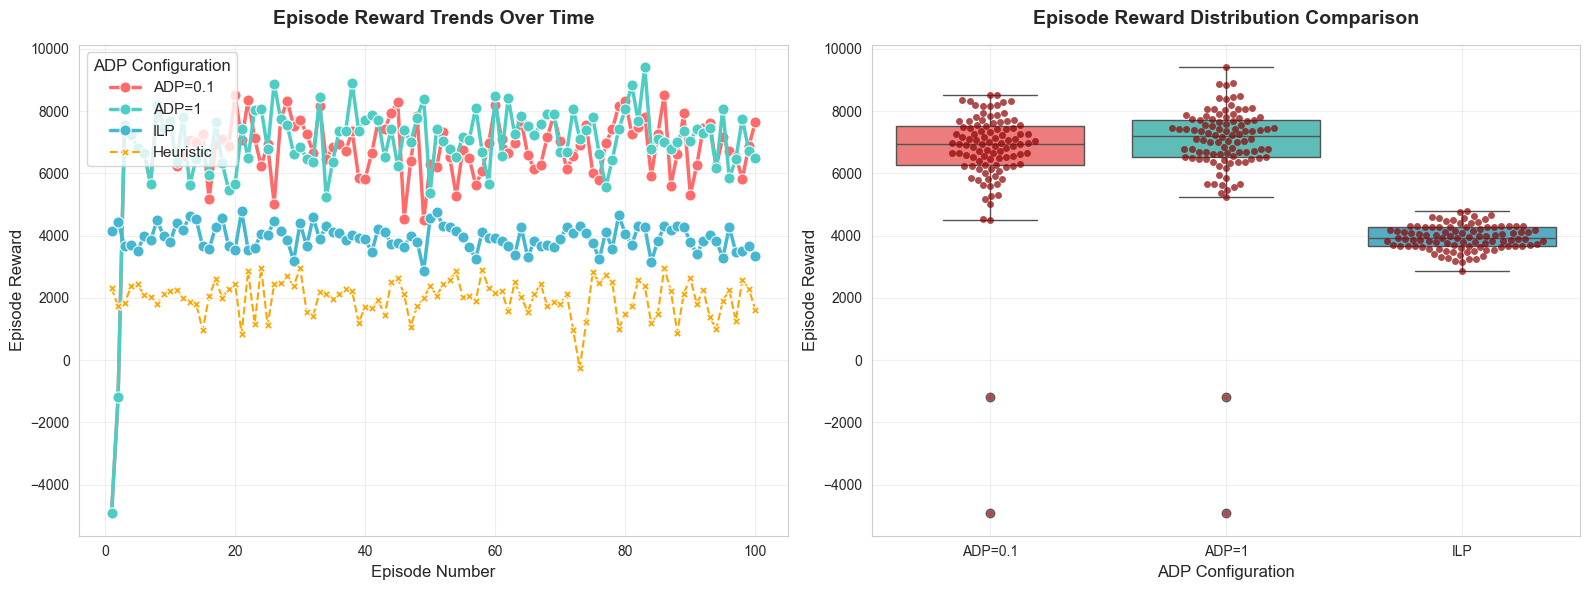

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.facecolor'] = 'white'
data_0_1 = data_list[0]
data_1_1 =  data_list[-1]
data_0_1 = data_0_1
data_1_1 = data_1_1
# Prepare data for visualization (unchanged)
data_for_plot = []
adp_0_5 = data_0_1
adp_1 = data_1_1
adp_0_h = adp_h
# Add ADP=0 data


# Add ADP=0.5 data
for i, reward in enumerate(adp_0_5['episode_reward']):
    data_for_plot.append({
        'Episode': i + 1,
        'Episode_Reward': reward,
        'ADP_Value': f'ADP=0.1',
        'ADP_Numeric': 0.5
    })

# Add ADP=1 data
for i, reward in enumerate(adp_1['episode_reward']):
    data_for_plot.append({
        'Episode': i + 1,
        'Episode_Reward': reward,
        'ADP_Value': f'ADP=1',
        'ADP_Numeric': 1
    })


for i, reward in enumerate(adp_0['episode_reward']):
    data_for_plot.append({
        'Episode': i + 1,
        'Episode_Reward': reward,
        'ADP_Value': f'ILP',
        'ADP_Numeric': 0
    })
    

# Convert to DataFrame
plot_df = pd.DataFrame(data_for_plot)

# Create two comparison plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# fig.suptitle('Impact of ADP Value on Episode Reward Performance', fontsize=18, fontweight='bold', y=1.02)

# Color palette for consistency
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# 1. Line plot: Episode reward trends over time (modified for clarity)
ax1 = axes[0]
sns.lineplot(data=plot_df, x='Episode', y='Episode_Reward', hue='ADP_Value', 
             marker='o', markersize=8, linewidth=2.5, ax=ax1, palette=colors)
sns.lineplot(data=adp_0_h, x=adp_0_h.index+1, y='episode_reward', 
             label='Heuristic', color='orange', linestyle='--', linewidth=1.5, 
             marker='X', markersize=6, ax=ax1)
ax1.set_title('Episode Reward Trends Over Time', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Episode Number', fontsize=12)
ax1.set_ylabel('Episode Reward', fontsize=12)
ax1.legend(title='ADP Configuration', title_fontsize=12, fontsize=11, loc='upper left')
ax1.grid(True, alpha=0.3)

# 2. Box plot with swarm: Reward distribution comparison (unchanged)
ax2 = axes[1]
sns.boxplot(data=plot_df, x='ADP_Value', y='Episode_Reward', ax=ax2, palette=colors)
sns.swarmplot(data=plot_df, x='ADP_Value', y='Episode_Reward', 
              color='darkred', alpha=0.7, size=5, ax=ax2)
ax2.set_title('Episode Reward Distribution Comparison', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('ADP Configuration', fontsize=12)
ax2.set_ylabel('Episode Reward', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [11]:
episode_reward_list

[6820.291417242408,
 6822.372004278153,
 6733.658049104354,
 7200.774846362122,
 7007.042099657874,
 7065.930405931807]

In [12]:
episode_reward_list_mbest = episode_reward_list.index(max(episode_reward_list))
episode_reward_list_mbest

3

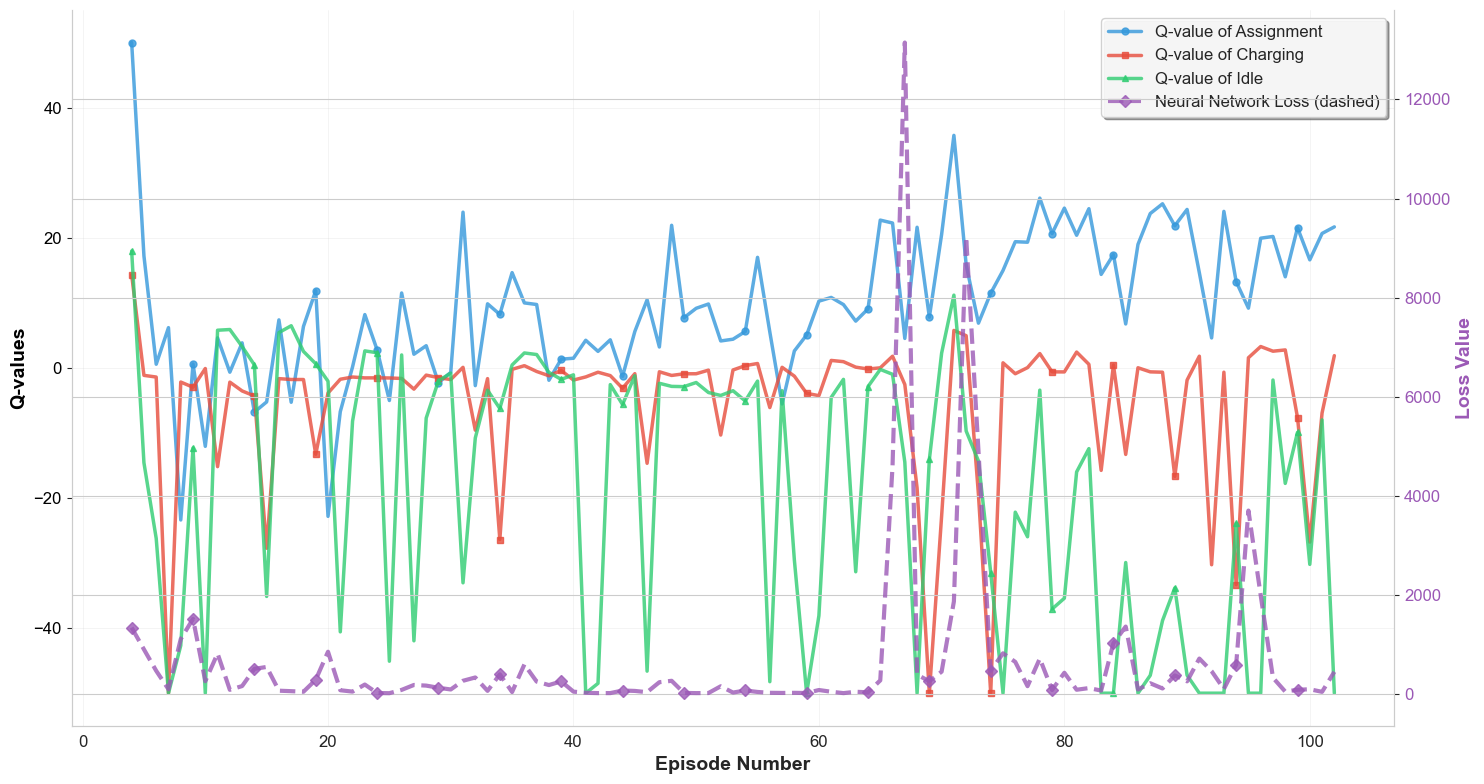

Q-VALUES AND LOSS ANALYSIS SUMMARY

📊 Q-Value Statistics:
   Assignment Q-value: Mean=9.8551, Range=[-23.3746, 50.0000]
   Charging Q-value:   Mean=-5.1877, Range=[-50.0000, 14.3072]
   Idle Q-value:       Mean=-18.5108, Range=[-50.0000, 17.9587]

🔻 Neural Network Loss:
   Initial Loss:  1338.409101
   Final Loss:    446.325702
   Loss Reduction: 66.65%

💡 Key Observations:
   • Neural network loss shows convergence trend (dashed purple line)
   • Q-values demonstrate learning patterns across different actions
   • Dual y-axis design allows comparison of different scale metrics
   • Loss starts from episode 2, aligning with neural network training schedule


In [13]:
episode_reward_list_mbest = episode_reward_list.index(max(episode_reward_list))
episode_reward_list_mbest
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['figure.facecolor'] = 'white'

# 创建双y轴图表
fig, ax1 = plt.subplots(figsize=(15, 8))
adp_0_1 = data_list[episode_reward_list_mbest]
adp_0_1 = adp_0_1[adp_0_1['neural_network_loss']>0]
# 定义颜色
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']  # 蓝色、红色、绿色、紫色

# 绘制Q值曲线（左y轴）
episodes = range(4, len(adp_0_1) + 4)

ax1.plot(episodes, adp_0_1['sample_assign_q_value'], 
         color=colors[0], linestyle='-', linewidth=2.5, 
         marker='o', markersize=5, alpha=0.8, markevery=5,
         label='Q-value of Assignment')

ax1.plot(episodes, adp_0_1['sample_charge_q_value'], 
         color=colors[1], linestyle='-', linewidth=2.5, 
         marker='s', markersize=5, alpha=0.8, markevery=5,
         label='Q-value of Charging')

ax1.plot(episodes, adp_0_1['sample_idle_q_value'], 
         color=colors[2], linestyle='-', linewidth=2.5, 
         marker='^', markersize=5, alpha=0.8, markevery=5,
         label='Q-value of Idle')

# 设置左y轴
ax1.set_xlabel('Episode Number', fontsize=14, fontweight='bold')
ax1.set_ylabel('Q-values', fontsize=14, fontweight='bold', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# 创建右y轴用于损失函数
ax2 = ax1.twinx()

# 绘制损失函数（虚线，从第二个数据点开始）
loss_data = adp_0_1['neural_network_loss']
loss_episodes = range(4, len(adp_0_1) + 4)  # x轴从4开始

ax2.plot(loss_episodes, loss_data, 
         color=colors[3], linestyle='--', linewidth=3, 
         marker='D', markersize=6, alpha=0.8, markevery=5,
         label='Neural Network Loss (dashed)')

# 设置右y轴
ax2.set_ylabel('Loss Value', fontsize=14, fontweight='bold', color=colors[3])
ax2.tick_params(axis='y', labelcolor=colors[3])

# 设置图表标题
# plt.title('Q-values and Neural Network Loss Over Episodes\n(ADP=0.1 Training Progress)', 
#           fontsize=16, fontweight='bold', pad=20)

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='best', fontsize=12, frameon=True, 
           fancybox=True, shadow=True, framealpha=0.9)

# 添加网格
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# 设置坐标轴样式
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# 调整布局
plt.tight_layout()
plt.show()

# 输出统计分析
print("="*80)
print("Q-VALUES AND LOSS ANALYSIS SUMMARY")
print("="*80)

print(f"\n📊 Q-Value Statistics:")
print(f"   Assignment Q-value: Mean={adp_0_1['sample_assign_q_value'].mean():.4f}, "
      f"Range=[{adp_0_1['sample_assign_q_value'].min():.4f}, {adp_0_1['sample_assign_q_value'].max():.4f}]")
print(f"   Charging Q-value:   Mean={adp_0_1['sample_charge_q_value'].mean():.4f}, "
      f"Range=[{adp_0_1['sample_charge_q_value'].min():.4f}, {adp_0_1['sample_charge_q_value'].max():.4f}]")
print(f"   Idle Q-value:       Mean={adp_0_1['sample_idle_q_value'].mean():.4f}, "
      f"Range=[{adp_0_1['sample_idle_q_value'].min():.4f}, {adp_0_1['sample_idle_q_value'].max():.4f}]")

print(f"\n🔻 Neural Network Loss:")
print(f"   Initial Loss:  {loss_data.iloc[0]:.6f}")
print(f"   Final Loss:    {loss_data.iloc[-1]:.6f}")
print(f"   Loss Reduction: {((loss_data.iloc[0] - loss_data.iloc[-1]) / loss_data.iloc[0] * 100):.2f}%")

print(f"\n💡 Key Observations:")
print(f"   • Neural network loss shows convergence trend (dashed purple line)")
print(f"   • Q-values demonstrate learning patterns across different actions")
print(f"   • Dual y-axis design allows comparison of different scale metrics")
print(f"   • Loss starts from episode 2, aligning with neural network training schedule")

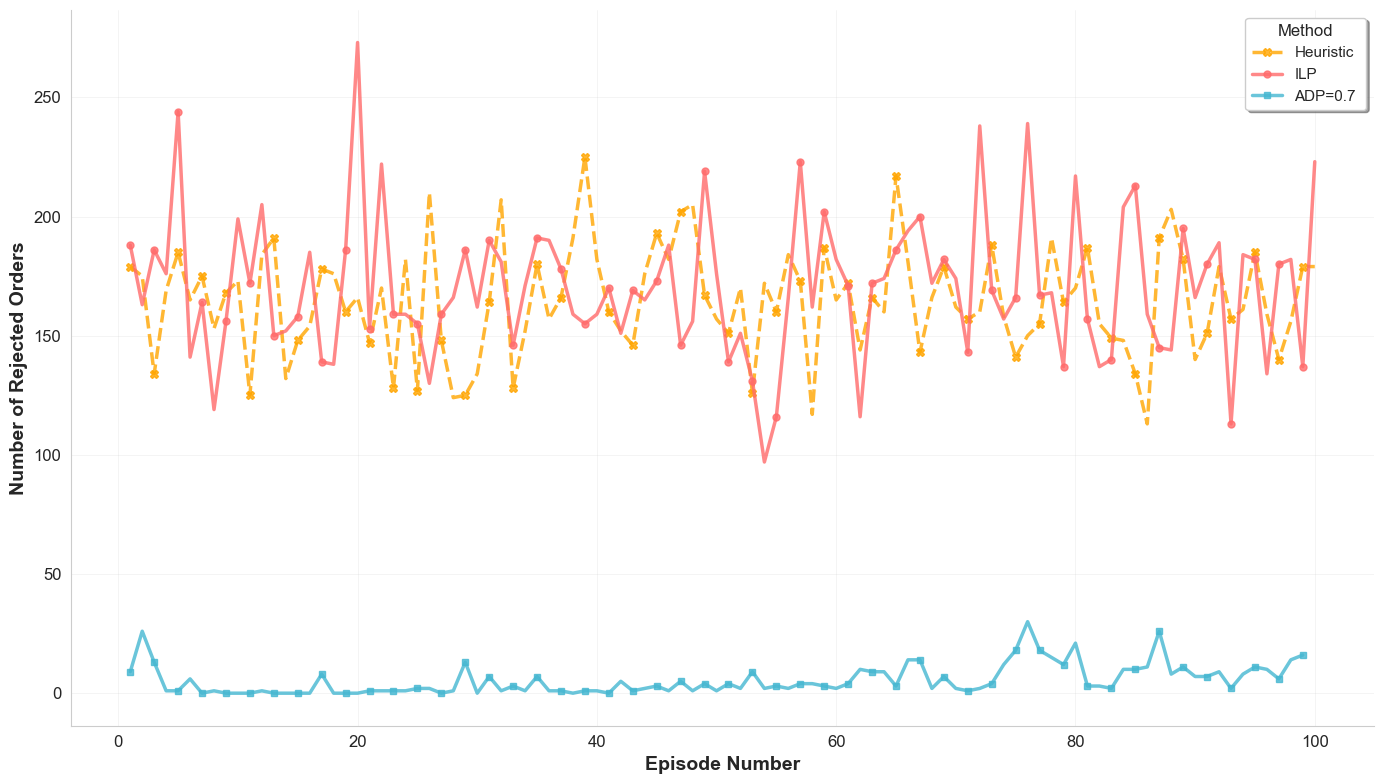

REJECTED ORDERS ANALYSIS SUMMARY

📊 Rejected Orders Statistics:
   Heuristic:        Mean=164.54, Total=16454, Range=[113, 225]
   ADP=0.0:          Mean=170.53, Total=17053, Range=[97, 273]
   ADP=0.7 (Best): Mean=5.56, Total=550, Range=[0, 30]

📈 Performance Improvements:
   ADP=0.0 vs Heuristic: 3.6% increase in rejected orders
   Best ADP vs Heuristic: 96.6% reduction in rejected orders
   Best ADP vs ADP=0.0: 96.7% reduction in rejected orders

💡 Key Observations:
   • Lower rejected orders indicate better assignment efficiency
   • Neural network learning can improve request acceptance rates
   • Comparison shows evolution of rejection behavior across episodes


In [14]:
# 比较三个表格的rejected_orders列变化 - 折线图
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# 创建图表
fig, ax = plt.subplots(figsize=(14, 8))

# 准备数据并绘制折线图
# Heuristic方法 (adp_h)
episodes_h = range(1, len(adp_h) + 1)
ax.plot(episodes_h, adp_h['rejected_orders'], 
        color='orange', linestyle='--', linewidth=2.5, 
        marker='X', markersize=6, alpha=0.8, markevery=2,
        label='Heuristic')

# ADP=0 (adp_0)  
episodes_0 = range(1, len(adp_0) + 1)
ax.plot(episodes_0, adp_0['rejected_orders'], 
        color='#FF6B6B', linestyle='-', linewidth=2.5, 
        marker='o', markersize=5, alpha=0.8, markevery=2,
        label='ILP')

# 最佳ADP权重的数据 (使用之前找到的最佳权重)
best_adp_data = data_list[episode_reward_list_mbest]
best_adp_data = best_adp_data[best_adp_data['neural_network_loss'] > 0]
best_weight = weights[episode_reward_list_mbest]

episodes_best = range(1, len(best_adp_data) + 1)
ax.plot(episodes_best, best_adp_data['rejected_orders'], 
        color='#45B7D1', linestyle='-', linewidth=2.5, 
        marker='s', markersize=5, alpha=0.8, markevery=2,
        label=f'ADP={best_weight} ')

# 设置图表属性
# ax.set_title('Rejected Orders Comparison Across Different Methods', 
#              fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Episode Number', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Rejected Orders', fontsize=14, fontweight='bold')

# 设置图例
ax.legend(title='Method', title_fontsize=12, fontsize=11, 
          loc='upper right', frameon=True, fancybox=True, shadow=True)

# 添加网格
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# 美化坐标轴
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# 输出统计信息
print("="*80)
print("REJECTED ORDERS ANALYSIS SUMMARY")
print("="*80)

print(f"\n📊 Rejected Orders Statistics:")
print(f"   Heuristic:        Mean={adp_h['rejected_orders'].mean():.2f}, "
      f"Total={adp_h['rejected_orders'].sum()}, "
      f"Range=[{adp_h['rejected_orders'].min()}, {adp_h['rejected_orders'].max()}]")

print(f"   ADP=0.0:          Mean={adp_0['rejected_orders'].mean():.2f}, "
      f"Total={adp_0['rejected_orders'].sum()}, "
      f"Range=[{adp_0['rejected_orders'].min()}, {adp_0['rejected_orders'].max()}]")

print(f"   ADP={best_weight} (Best): Mean={best_adp_data['rejected_orders'].mean():.2f}, "
      f"Total={best_adp_data['rejected_orders'].sum()}, "
      f"Range=[{best_adp_data['rejected_orders'].min()}, {best_adp_data['rejected_orders'].max()}]")

# 计算改善幅度
heuristic_mean = adp_h['rejected_orders'].mean()
adp0_mean = adp_0['rejected_orders'].mean()
best_mean = best_adp_data['rejected_orders'].mean()

print(f"\n📈 Performance Improvements:")
if adp0_mean < heuristic_mean:
    improvement_0 = ((heuristic_mean - adp0_mean) / heuristic_mean) * 100
    print(f"   ADP=0.0 vs Heuristic: {improvement_0:.1f}% reduction in rejected orders")
else:
    degradation_0 = ((adp0_mean - heuristic_mean) / heuristic_mean) * 100
    print(f"   ADP=0.0 vs Heuristic: {degradation_0:.1f}% increase in rejected orders")

if best_mean < heuristic_mean:
    improvement_best = ((heuristic_mean - best_mean) / heuristic_mean) * 100
    print(f"   Best ADP vs Heuristic: {improvement_best:.1f}% reduction in rejected orders")
else:
    degradation_best = ((best_mean - heuristic_mean) / heuristic_mean) * 100
    print(f"   Best ADP vs Heuristic: {degradation_best:.1f}% increase in rejected orders")

if best_mean < adp0_mean:
    improvement_vs_0 = ((adp0_mean - best_mean) / adp0_mean) * 100
    print(f"   Best ADP vs ADP=0.0: {improvement_vs_0:.1f}% reduction in rejected orders")
else:
    degradation_vs_0 = ((best_mean - adp0_mean) / adp0_mean) * 100
    print(f"   Best ADP vs ADP=0.0: {degradation_vs_0:.1f}% increase in rejected orders")

print(f"\n💡 Key Observations:")
print(f"   • Lower rejected orders indicate better assignment efficiency")
print(f"   • Neural network learning can improve request acceptance rates")
print(f"   • Comparison shows evolution of rejection behavior across episodes")

✓ Environment random seed set to 123
✓ Vehicles initialized with fixed seed 123 - consistent initial states
✓ Initialized integrated environment: 1 vehicles, 1 charging stations
✓ Environment random seed set to 124
✓ Vehicles initialized with fixed seed 124 - consistent initial states
✓ Initialized integrated environment: 1 vehicles, 1 charging stations
✓ Request generation seed set to 223
✓ Request generation seed set to 323


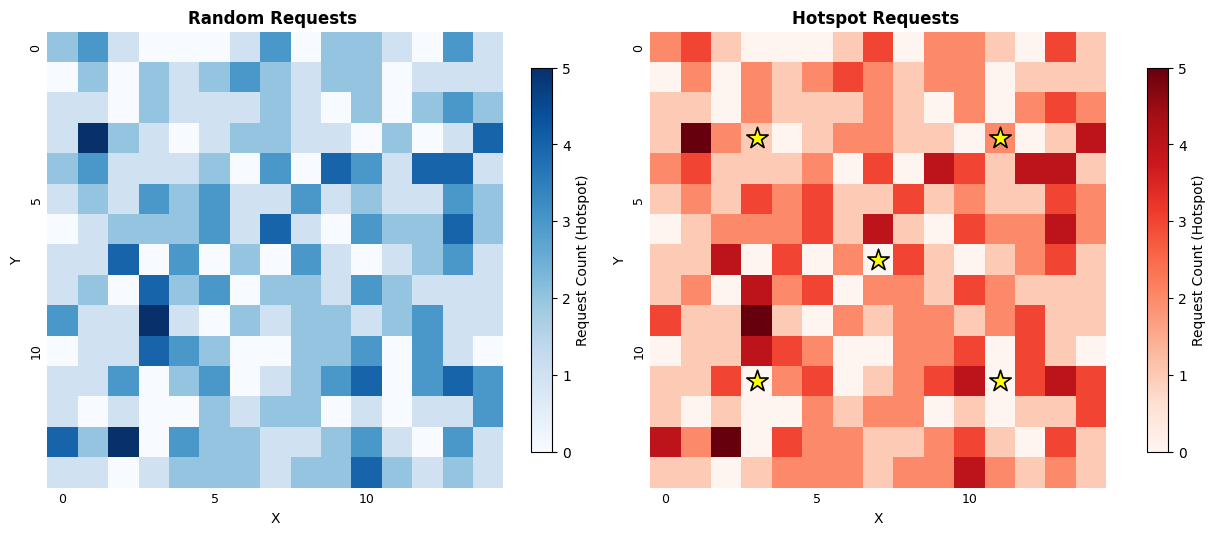

In [2]:
# 对比 _generate_random_requests 与 _generate_random_requests 生成需求的空间分布热力图
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from src.Environment import ChargingIntegratedEnvironment

# 参数设置
grid_size = 15              # 可调整网格大小，与训练环境保持一致
steps = 100                 # 生成步骤（越大统计越平滑）
force_generation = True     # 强制每步生成请求（设置生成概率为1.0）
seed_base = 123             # 基础种子，保证可复现

# 创建两个环境实例：一个用于随机生成，一个用于热点生成
env_random = ChargingIntegratedEnvironment(num_vehicles=1, num_stations=1, grid_size=grid_size, use_intense_requests=False, random_seed=seed_base)
env_random = ChargingIntegratedEnvironment(num_vehicles=1, num_stations=1, grid_size=grid_size, use_intense_requests=True, random_seed=seed_base+1)

# 强制每步都尝试生成请求
env_random.request_generation_rate = 1.0 if force_generation else env_random.request_generation_rate
env_random.request_generation_rate = 1.0 if force_generation else env_random.request_generation_rate

# 为请求生成设置独立种子（与车辆初始化种子解耦）
env_random.set_request_generation_seed(seed_base + 100)
env_random.set_request_generation_seed(seed_base + 200)

# 数据累积矩阵
heat_random = np.zeros((grid_size, grid_size), dtype=int)
heat_random = np.zeros((grid_size, grid_size), dtype=int)

# 模拟请求生成（直接调用内部方法，不执行完整 step）
for t in range(steps):
    # 随机模式
    reqs_r = env_random._generate_random_requests()
    for r in reqs_r:
        loc = getattr(r, 'source', getattr(r, 'pickup', None))
        if loc is not None:
            x = loc % grid_size
            y = loc // grid_size
            if 0 <= x < grid_size and 0 <= y < grid_size:
                heat_random[y, x] += 1

    # 热点模式
    reqs_i = env_random._generate_random_requests()
    for r in reqs_i:
        loc = getattr(r, 'source', getattr(r, 'pickup', None))
        if loc is not None:
            x = loc % grid_size
            y = loc // grid_size
            if 0 <= x < grid_size and 0 <= y < grid_size:
                heat_random[y, x] += 1

# 统一颜色尺度，便于对比
vmax = max(heat_random.max(), heat_random.max())

# 绘图（调整布局，预留右侧颜色条空间）
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.subplots_adjust(right=0.9, wspace=0.25, bottom=0.12)

# 随机生成模式热力图
ax0 = axes[0]
im0 = sns.heatmap(heat_random, ax=ax0, cmap='Blues', square=True, cbar=False, vmin=0, vmax=vmax)
ax0.set_title('Random Requests ', fontsize=12, fontweight='bold')
ax0.set_xlabel('X')
ax0.set_ylabel('Y')

# 热点生成模式热力图
ax1 = axes[1]
im1 = sns.heatmap(heat_random, ax=ax1, cmap='Reds', square=True, cbar=False, vmin=0, vmax=vmax)
ax1.set_title('Hotspot Requests ', fontsize=12, fontweight='bold')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# 每隔5个网格显示一次刻度
ticks = np.arange(0, grid_size, 5)
for ax in axes:
    ax.set_xticks(ticks + 0.5)  # heatmap 方格中心对齐
    ax.set_yticks(ticks + 0.5)
    ax.set_xticklabels(ticks)
    ax.set_yticklabels(ticks)
    ax.tick_params(axis='both', which='both', length=0, labelsize=9)

# === 在热点图上标注热点中心（五角星） ===
hotspots = [
    (grid_size // 4, grid_size // 4),
    (3 * grid_size // 4, grid_size // 4),
    (grid_size // 2, grid_size // 2),
    (grid_size // 4, 3 * grid_size // 4),
    (3 * grid_size // 4, 3 * grid_size // 4)
 ]
for idx, (hx, hy) in enumerate(hotspots):
    ax1.scatter(hx + 0.5, hy + 0.5, marker='*', s=260, c='yellow', edgecolors='black', linewidths=1.2, zorder=5)

# 颜色条：右侧垂直（热点图） + 左侧图下方水平（随机图）
# 垂直颜色条（右侧）
cax_right = fig.add_axes([0.92, 0.18, 0.015, 0.64])
cbar_r = fig.colorbar(im1.collections[0], cax=cax_right)
cbar_r.set_label('Request Count (Hotspot)', rotation=90)
# 水平颜色条（左侧图下方）
cax_right = fig.add_axes([0.48, 0.18, 0.015, 0.64])
cbar_r = fig.colorbar(im0.collections[0], cax=cax_right)
cbar_r.set_label('Request Count (Hotspot)', rotation=90)

plt.show()

In [23]:
weights = [0.2+i*0.05 for i in range(7)]
weights[2] = 0.3
weights[3] = 0.35
weights

[0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

In [35]:
# 读取所有以episode_statistics_adp0_demandrandom为前缀的Excel文件
import glob
weights = weights
file_pattern_list = []
for weight in weights:
    file_pattern_list.append(f'results/integrated_tests_h/episode_statistics_adp0_demandrandom_{weight}_*.xlsx')


matching_files_list = []
for file_pattern in file_pattern_list:
    matching_files = glob.glob(file_pattern)
    matching_files_list.append(matching_files)

data_list = []
for matching_files in matching_files_list:
    adp = pd.read_excel(matching_files[0], sheet_name='Episode_Statistics')
    data_list.append(adp)



In [36]:
compare_list = ['episode_reward','completed_orders','rejected_orders', 'avg_request_value', 'avg_battery_level', 'finished_charge']
episode_reward_list = []
avg_battery_level_list = []
num = 0
for i in range(len(data_list)):
    result = ""
    data = data_list[i]
    result+= str(num)+" & R&"
    result+= str(weights[i])+" & "
    for item in compare_list:
        if item in data_list[0].columns:
            if item == 'avg_battery_level':
                avg_battery_level_list.append(data[item].mean())
            if item == 'episode_reward':
                episode_reward_list.append(data[item].mean())
            result += f"{data[item].mean():.2f} & "
        else:
            result += "- & "
    result += "\\\\"
    print(result)
    num +=1

0 & R&0.2 & 1961.42 & 36.27 & 166.70 & 100.22 & 0.51 & 40.82 & \\
1 & R&0.25 & 2002.25 & 35.88 & 164.54 & 100.59 & 0.53 & 42.38 & \\
2 & R&0.3 & 1738.87 & 33.62 & 162.23 & 100.28 & 0.62 & 48.53 & \\
3 & R&0.35 & 1746.09 & 33.64 & 160.40 & 100.50 & 0.64 & 49.64 & \\
4 & R&0.4 & 1765.44 & 33.56 & 154.36 & 100.65 & 0.61 & 50.24 & \\
5 & R&0.45 & 1706.75 & 32.91 & 152.24 & 100.97 & 0.61 & 51.61 & \\
6 & R&0.5 & 1691.84 & 31.28 & 152.04 & 102.94 & 0.69 & 56.34 & \\


In [37]:
# 读取所有以episode_statistics_adp0_demandrandom为前缀的Excel文件
import glob
weights = weights
file_pattern_list = []
for weight in weights:
    file_pattern_list.append(f'results/integrated_tests_h/episode_statistics_adp0_demandintense_{weight}_*.xlsx')


matching_files_list = []
for file_pattern in file_pattern_list:
    matching_files = glob.glob(file_pattern)
    matching_files_list.append(matching_files)

data_list = []
for matching_files in matching_files_list:
    adp = pd.read_excel(matching_files[0], sheet_name='Episode_Statistics')
    data_list.append(adp)



In [39]:
compare_list = ['episode_reward','completed_orders','rejected_orders', 'avg_request_value', 'avg_battery_level', 'finished_charge']
episode_reward_list = []
avg_battery_level_list = []
num = 0
for i in range(len(data_list)):
    result = ""
    data = data_list[i]
    result+= str(num+7)+" & H&"
    result+= str(weights[i])+" & "
    for item in compare_list:
        if item in data_list[0].columns:
            if item == 'avg_battery_level':
                avg_battery_level_list.append(data[item].mean())
            if item == 'episode_reward':
                episode_reward_list.append(data[item].mean())
            result += f"{data[item].mean():.2f} & "
        else:
            result += "- & "
    result += "\\\\"
    print(result)
    num +=1

7 & H&0.2 & 401.52 & 37.98 & 168.69 & 51.71 & 0.49 & 40.71 & \\
8 & H&0.25 & 544.44 & 37.93 & 171.59 & 51.84 & 0.52 & 42.05 & \\
9 & H&0.3 & 467.74 & 36.36 & 170.81 & 52.12 & 0.62 & 47.90 & \\
10 & H&0.35 & 454.39 & 35.92 & 166.19 & 51.91 & 0.63 & 48.92 & \\
11 & H&0.4 & 443.67 & 35.59 & 165.91 & 52.15 & 0.63 & 50.08 & \\
12 & H&0.45 & 419.80 & 35.01 & 167.03 & 52.18 & 0.62 & 50.90 & \\
13 & H&0.5 & 415.19 & 33.28 & 162.16 & 52.57 & 0.71 & 56.75 & \\


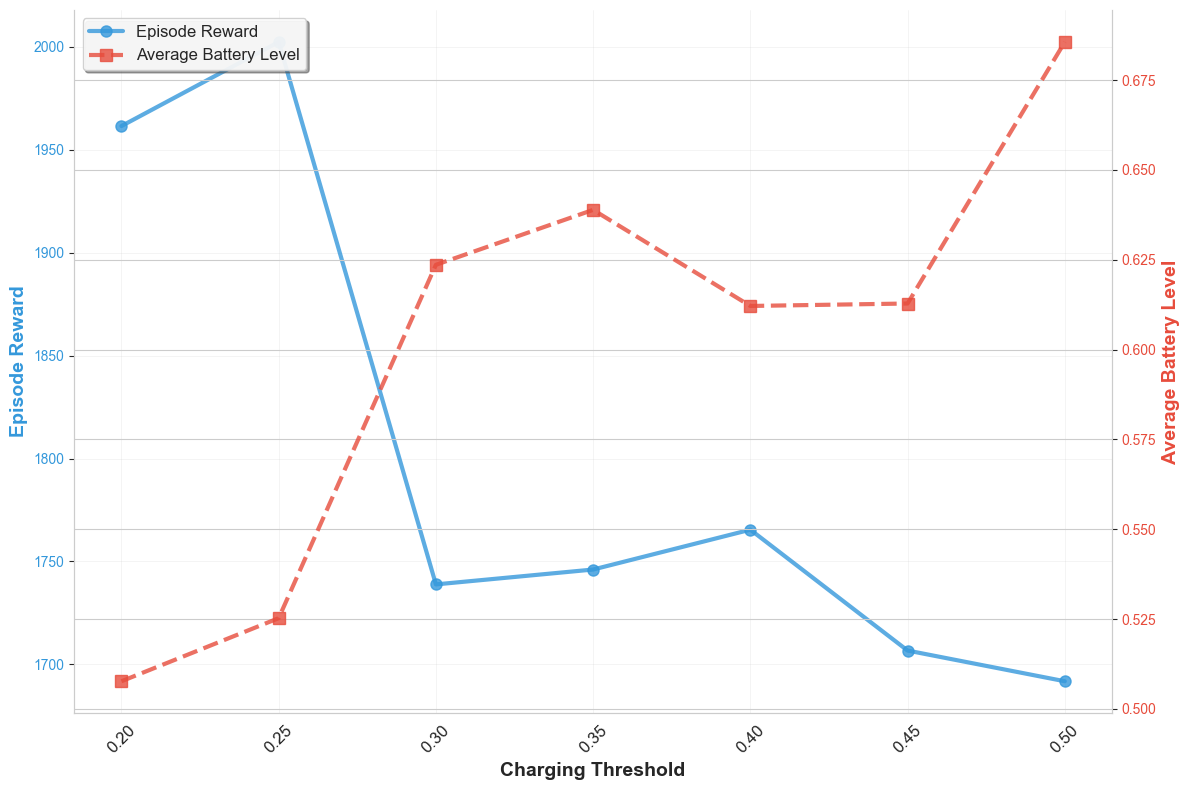

In [32]:
# 使用weights作为x轴，绘制episode_reward和avg_battery_level的双折线图
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置绘图风格
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# 创建双y轴图表
fig, ax1 = plt.subplots(figsize=(12, 8))

# 定义颜色
colors = ['#3498db', '#e74c3c']  # 蓝色用于episode_reward，红色用于battery_level

# 绘制Episode Reward折线（左y轴）
ax1.plot(weights, episode_reward_list, 
         color=colors[0], linestyle='-', linewidth=3, 
         marker='o', markersize=8, alpha=0.8,
         label='Episode Reward')

# 设置左y轴
ax1.set_xlabel('Charging Threshold', fontsize=14, fontweight='bold')
ax1.set_ylabel('Episode Reward', fontsize=14, fontweight='bold', color=colors[0])
ax1.tick_params(axis='y', labelcolor=colors[0])
ax1.tick_params(axis='x', labelsize=12)

# 创建右y轴用于Battery Level
ax2 = ax1.twinx()

# 绘制Average Battery Level折线（右y轴）
ax2.plot(weights, avg_battery_level_list, 
         color=colors[1], linestyle='--', linewidth=3, 
         marker='s', markersize=8, alpha=0.8,
         label='Average Battery Level')

# 设置右y轴
ax2.set_ylabel('Average Battery Level', fontsize=14, fontweight='bold', color=colors[1])
ax2.tick_params(axis='y', labelcolor=colors[1])

# 设置图表标题
# plt.title('Episode Reward and Battery Level vs Charging Threshold', 
#           fontsize=16, fontweight='bold', pad=20)

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='upper left', fontsize=12, frameon=True, 
           fancybox=True, shadow=True, framealpha=0.9)

# 添加网格
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# 设置坐标轴样式
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# 设置x轴刻度
ax1.set_xticks(weights)
ax1.set_xticklabels([f'{w:.2f}' for w in weights], rotation=45)

plt.tight_layout()
plt.show()

